In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras import optimizers
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv("C:/Users/Sohaila/Documents/هنا حيث الروعة كلها/sign language detection project/data sets/sign language data _arabic/sign_language_test.csv")

In [3]:
#print(data.head())
data = np.array(data)
print(data.shape)

np.random.shuffle(data)
train = data[0:50000].T
test =  data[50000:].T

train_data = (train[1:]).T
train_labels = train[0]
print(train_labels)
print(train_data.shape)

test_data   = test[1:].T
test_labels = test[0]
print(test_labels)
print(test_data.shape)

test_data  = test_data.reshape (len(test_data)  , 64, 64)
train_data = train_data.reshape(len(train_data) , 64, 64)

test_data  = test_data.astype('float32')
train_data = train_data.astype('float32')
idx = random.randint(0,len(test_data))

(53391, 4097)
['haa' 'toot' 'dal' ... 'laam' 'laam' 'ghain']
(50000, 4096)
['jeem' 'seen' 'dal' ... 'ra' 'dhad' 'thaa']
(3391, 4096)


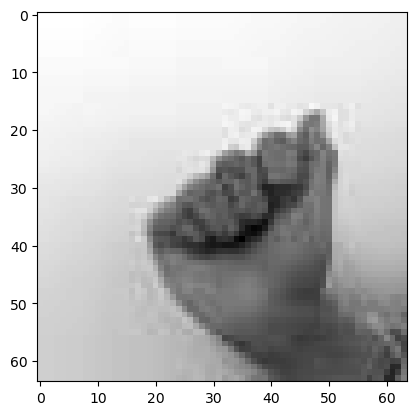

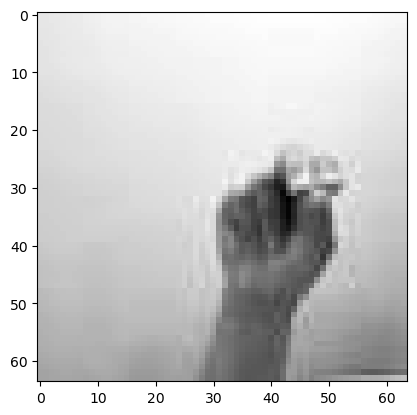

In [7]:
plt.gray()
plt.imshow(test_data[idx , :])
plt.show()

plt.gray()
plt.imshow(train_data[idx , :])
plt.show()

In [11]:
print(len(np.unique(train_labels)))
print(np.unique(train_labels))
print(np.unique(test_labels))

32
['ain' 'al' 'aleff' 'bb' 'dal' 'dha' 'dhad' 'fa' 'gaaf' 'ghain' 'ha' 'haa'
 'jeem' 'kaaf' 'khaa' 'la' 'laam' 'meem' 'nun' 'ra' 'saad' 'seen' 'sheen'
 'ta' 'taa' 'thaa' 'thal' 'toot' 'waw' 'ya' 'yaa' 'zay']
['ain' 'al' 'aleff' 'bb' 'dal' 'dha' 'dhad' 'fa' 'gaaf' 'ghain' 'ha' 'haa'
 'jeem' 'kaaf' 'khaa' 'la' 'laam' 'meem' 'nun' 'ra' 'saad' 'seen' 'sheen'
 'ta' 'taa' 'thaa' 'thal' 'toot' 'waw' 'ya' 'yaa' 'zay']


In [4]:
#for one hot encoding we first need to convert the string values in the utput to numeric values
for label in range(len(train_labels)):
    if train_labels[label] == "ain":
        train_labels[label] = 0
    elif train_labels[label] == "al":
        train_labels[label] = 1
    elif train_labels[label] == "aleff":
        train_labels[label] = 2
    elif train_labels[label] == "bb":
        train_labels[label] = 3
    elif train_labels[label] == "dal":
        train_labels[label] = 4
    elif train_labels[label] == "dha":
        train_labels[label] = 5
    elif train_labels[label] == "dhad":
        train_labels[label] = 6
    elif train_labels[label] == "fa":
        train_labels[label] = 7
    elif train_labels[label] == "gaaf":
        train_labels[label] = 8
    elif train_labels[label] == "ghain":
        train_labels[label] = 9
    elif train_labels[label] == "ha":
        train_labels[label] = 10
    elif train_labels[label] == "haa":
        train_labels[label] = 11
    elif train_labels[label] == "jeem":
        train_labels[label] = 12
    elif train_labels[label] == "kaaf":
        train_labels[label] = 13
    elif train_labels[label] == "khaa":
        train_labels[label] = 14
    elif train_labels[label] == "la":
        train_labels[label] = 15
    elif train_labels[label] == "laam":
        train_labels[label] = 16
    elif train_labels[label] == "meem":
        train_labels[label] = 17
    elif train_labels[label] == "nun":
        train_labels[label] = 18
    elif train_labels[label] == "ra":
        train_labels[label] = 19
    elif train_labels[label] == "saad":
        train_labels[label] = 20
    elif train_labels[label] == "seen":
        train_labels[label] = 21
    elif train_labels[label] == "sheen":
        train_labels[label] = 22
    elif train_labels[label] == "ta":
        train_labels[label] = 23
    elif train_labels[label] == "taa":
        train_labels[label] = 24
    elif train_labels[label] == "thaa":
        train_labels[label] = 25
    elif train_labels[label] == "thal":
        train_labels[label] = 26
    elif train_labels[label] == "toot":
        train_labels[label] = 27
    elif train_labels[label] == "waw":
        train_labels[label] = 28
    elif train_labels[label] == "ya":
        train_labels[label] = 29
    elif train_labels[label] == "yaa":
        train_labels[label] = 30
    elif train_labels[label] == "zay":
        train_labels[label] = 31

for label in range(len(test_labels)):
    if test_labels[label] == "ain":
        test_labels[label] = 0
    elif test_labels[label] == "al":
        test_labels[label] = 1
    elif test_labels[label] == "aleff":
        test_labels[label] = 2
    elif test_labels[label] == "bb":
        test_labels[label] = 3
    elif test_labels[label] == "dal":
        test_labels[label] = 4
    elif test_labels[label] == "dha":
        test_labels[label] = 5
    elif test_labels[label] == "dhad":
        test_labels[label] = 6
    elif test_labels[label] == "fa":
        test_labels[label] = 7
    elif test_labels[label] == "gaaf":
        test_labels[label] = 8
    elif test_labels[label] == "ghain":
        test_labels[label] = 9
    elif test_labels[label] == "ha":
        test_labels[label] = 10
    elif test_labels[label] == "haa":
        test_labels[label] = 11
    elif test_labels[label] == "jeem":
        test_labels[label] = 12
    elif test_labels[label] == "kaaf":
        test_labels[label] = 13
    elif test_labels[label] == "khaa":
        test_labels[label] = 14
    elif test_labels[label] == "la":
        test_labels[label] = 15
    elif test_labels[label] == "laam":
        test_labels[label] = 16
    elif test_labels[label] == "meem":
        test_labels[label] = 17
    elif test_labels[label] == "nun":
        test_labels[label] = 18
    elif test_labels[label] == "ra":
        test_labels[label] = 19
    elif test_labels[label] == "saad":
        test_labels[label] = 20
    elif test_labels[label] == "seen":
        test_labels[label] = 21
    elif test_labels[label] == "sheen":
        test_labels[label] = 22
    elif test_labels[label] == "ta":
        test_labels[label] = 23
    elif test_labels[label] == "taa":
        test_labels[label] = 24
    elif test_labels[label] == "thaa":
        test_labels[label] = 25
    elif test_labels[label] == "thal":
        test_labels[label] = 26
    elif test_labels[label] == "toot":
        test_labels[label] = 27
    elif test_labels[label] == "waw":
        test_labels[label] = 28
    elif test_labels[label] == "ya":
        test_labels[label] = 29
    elif test_labels[label] == "yaa":
        test_labels[label] = 30
    elif test_labels[label] == "zay":
        test_labels[label] = 31

#to get the name of the letter in the final stage after doing the prediction
def get_letter(num):
    if num == 0:
        c = "ع"    
    elif num == 1:
        c = "ال"
    elif num == 2:
        c = "أ"
    elif num == 3:
        c = "ب"
    elif num == 4:
        c = "د"
    elif num == 5:
        c = "ظ"
    elif num == 6:
        c = "ض"
    elif num == 7:
        c = "ف"
    elif num == 8:
        c = "ق"
    elif num == 9:
        c = "غ"
    elif num == 10:
        c = "ه"
    elif num == 11:
        c = "ح"
    elif num == 12:
        c = "ج"
    elif num == 13:
        c = "ك"
    elif num == 14:
        c = "خ"
    elif num == 15:
        c = "la"
    elif num == 16:
        c = "laam"
    elif num == 17:
        c = "meem"
    elif num == 18:
        c = "nun"
    elif num == 19:
        c = "ra"
    elif num == 20:
        c = "saad"
    elif num == 21:
        c = "seen"
    elif num == 22:
        c = "sheen"
    elif num == 23:
        c = "ta"
    elif num == 24:
        c = "taa"
    elif num == 25:
        c = "thaa"
    elif num == 26:
        c = "thal"
    elif num == 27:
        c = "toot"
    elif num == 28:
        c = "waw"
    elif num == 29:
        c = "ya"
    elif num == 30:
        c = "yaa"
    elif num == 31:
        c = "zay"
        
    return c

train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)
print(train_labels)
print("*****************")
print(test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
*****************
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
train_data = train_data/255
test_data  = test_data/255
print(train_data[1:])
print("**********")
print(test_data[1:])
print(len(train_data))

[[[0.90588236 0.90588236 0.90588236 ... 0.87058824 0.87058824 0.87058824]
  [0.90588236 0.90588236 0.90588236 ... 0.87058824 0.87058824 0.87058824]
  [0.90588236 0.90588236 0.90588236 ... 0.87058824 0.87058824 0.87058824]
  ...
  [0.79607844 0.79607844 0.79607844 ... 0.7372549  0.73333335 0.7294118 ]
  [0.79607844 0.79607844 0.79607844 ... 0.73333335 0.7294118  0.7294118 ]
  [0.79607844 0.79607844 0.79607844 ... 0.73333335 0.7294118  0.7294118 ]]

 [[0.84313726 0.84313726 0.84313726 ... 0.8666667  0.85882354 0.85490197]
  [0.84313726 0.84313726 0.84313726 ... 0.8627451  0.85490197 0.8509804 ]
  [0.84313726 0.84313726 0.84313726 ... 0.8509804  0.84705883 0.84313726]
  ...
  [0.69411767 0.69411767 0.69411767 ... 0.61960787 0.60784316 0.6039216 ]
  [0.6901961  0.6901961  0.6901961  ... 0.60784316 0.60784316 0.60784316]
  [0.6901961  0.6901961  0.6901961  ... 0.60784316 0.6156863  0.61960787]]

 [[0.2627451  0.2627451  0.25882354 ... 0.17254902 0.17254902 0.17254902]
  [0.25882354 0.258823

In [6]:
model = Sequential()
#first make the design of the model
#we will not make a stride to our convolution so the stride = 1 

#first layer of the model
model.add(Conv2D(32 , (2,2) , activation = 'relu' , input_shape = (64,64,1)))
model.add(MaxPooling2D((2,2)))

#second layer of the model
model.add(Conv2D(64 , (2,2) , activation = "relu"))
model.add(MaxPooling2D((2,2)))

#third layer of the model
model.add(Conv2D(128 , (2,2) , activation = "relu"))
model.add(MaxPooling2D((2,2)))

#fourth layer of the model
model.add(Flatten())
model.add(Dense(256 , activation = "relu"))

#fifth layer 
model.add(Dense(32 , activation = "softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 63, 63, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

In [ ]:
# second step is to design the backward propagation algorithm
opt = optimizers.SGD(learning_rate = 0.01)
model.compile(loss = "categorical_crossentropy" , optimizer = "adam"  , metrics = ["accuracy"])

#now as the model is ready we can input our train data to it to train the data
#the epochs are the number of times our data will enter the model to improve the 
#efficiencey of the prediction and the data is batched to decrease the time needed to train the model
#model.fit(train_data , train_labels , epochs = 5 , batch_size = 64)

model.fit(train_data , train_labels , batch_size = 128 , epochs = 8)

Epoch 1/10
391/391 [==============================] - 101s 252ms/step - loss: 1.4604 - accuracy: 0.5866
Epoch 2/10
391/391 [==============================] - 79s 201ms/step - loss: 0.3269 - accuracy: 0.9163
Epoch 3/10
391/391 [==============================] - 89s 229ms/step - loss: 0.1874 - accuracy: 0.9517
Epoch 4/10
391/391 [==============================] - 85s 217ms/step - loss: 0.1271 - accuracy: 0.9663
Epoch 5/10
391/391 [==============================] - 86s 221ms/step - loss: 0.0941 - accuracy: 0.9741
Epoch 6/10
391/391 [==============================] - 88s 225ms/step - loss: 0.0686 - accuracy: 0.9803
Epoch 7/10
391/391 [==============================] - 82s 209ms/step - loss: 0.0546 - accuracy: 0.9847
Epoch 8/10
391/391 [==============================] - 94s 239ms/step - loss: 0.0427 - accuracy: 0.9875
Epoch 9/10
391/391 [==============================] - 85s 216ms/step - loss: 0.0411 - accuracy: 0.9885
Epoch 10/10
391/391 [==============================] - 87s 221ms/step - 

In [22]:
#now we can evaluate our model using the testing data
model.evaluate(test_data , test_labels)

106/106 [==============================] - 3s 8ms/step - loss: 0.1975 - accuracy: 0.9596


[0.19745121896266937, 0.959598958492279]

In [ ]:
#now my model is ready and i can predict any sign i want :)

#display any random image from the test data
idx = random.randint(0,len(test_data))
plt.gray()
plt.imshow(test_data[idx , :]*255)
plt.show()

#make the prediction on this image
prediction = np.argmax(prediction)
prediction = model.predict(test_data[idx , : ].reshape(1,64,64,1))
prediction = np.argmax(prediction)
prediction = get_letter(prediction)

print(f"I think this image is for sign: ", prediction)